In [1395]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [1396]:

def gini(total_class: int, column: int, column_class: int, datos: list):
    unique_characteristics = return_unique_characteristics(column=column)
    dictionary = create_dictionary(unique_characteristics=unique_characteristics, total_class=total_class)

    for i in np.arange(datos.shape[0]):
        key = datos[i,column] + datos[i, column_class]
        dictionary[key] = dictionary[key] + 1


    total_sum = 0
    for characteristic in unique_characteristics:
        simple_sum = 0
        ni = 0
        for i in np.arange(total_class):
            key = str(characteristic) + str(i)
            simple_sum += dictionary[key] / datos.shape[0]
            ni += dictionary[key]
        simple_sum = 1 - simple_sum
        total_sum += (simple_sum * ni) / datos.shape[0] 
    print(total_sum)

winner_profiles = [[12]]

In [1397]:
def return_unique_characteristics(column: int, datos: list) -> list:
    characteristics = datos[:,column].tolist()
    characteristics

    unique_characteristics = []

    for characteristic in characteristics:
        if not(characteristic in unique_characteristics):
            unique_characteristics.append(characteristic)
    return unique_characteristics

def create_dictionary(unique_characteristics: list, total_class: int) -> dict:
    dictionary = dict()

    for characteristic in unique_characteristics:    
        for i in np.arange(total_class):
            key = str(characteristic) + str(i)
            dictionary.setdefault(key, 0)
    return dictionary

def entropia(total_class: int, column: int, column_class: int, datos: list):
    unique_characteristics = return_unique_characteristics(column=column, datos=datos)
    dictionary = create_dictionary(unique_characteristics=unique_characteristics, total_class=total_class)

    for i in np.arange(datos.shape[0]):
        key = str(datos[i,column]) + str(datos[i, column_class])
        dictionary[key] = dictionary[key] + 1

    total_sum = 0
    for characteristic in unique_characteristics:
        simple_sum = 0
        ni = 0
        for i in np.arange(total_class):
            key = str(characteristic) + str(i)
            res = (dictionary[key] / datos.shape[0])
            if(res):
                res = res * math.log2(dictionary[key] / datos.shape[0])
            simple_sum += res
            ni += dictionary[key]
        simple_sum = - simple_sum
        total_sum += (simple_sum * ni) / datos.shape[0] 
    return total_sum

import pandas as pd
import scipy.stats as stats

def correlacion_Pearson(df, result):
    columna_1 = df.iloc[:, result[0][0]]

    # Calcula la asociación entre la primera columna y el resto de columnas utilizando la prueba de chi-cuadrado
    asociaciones = []
    for columna in df.columns[:-1]:  # Excluimos la última columna (clase)
        tabla_contingencia = pd.crosstab(columna_1, df[columna])
        _, p_value, _, _ = stats.chi2_contingency(tabla_contingencia)
        asociaciones.append(p_value)

    return asociaciones


# **Twitter**

In [1398]:
df = pd.read_csv('Twitter.csv')
características_twitter = []

In [1399]:
df.head()

,Unnamed: 0,nombre,cantidad_caracteres_nombre,tiene_foto_perfil,cantidad_seguidores,cantidad_seguidos,promedio_publicaciones,perfil_privado,dia_mas_publica,comenta_publicaciones,clase
0,0,Catalin31937081,largo,Sí,bajo,bajo,bajo,No,Fin de semana,Sí,Fake
1,1,JadeCrespo8,medio,Sí,bajo,medio,bajo,No,Inicio de semana,Sí,Fake
2,2,V12Ara,corto,Sí,bajo,bajo,bajo,No,Inicio de semana,Sí,Fake
3,3,BriannaLun_,medio,Sí,bajo,bajo,bajo,No,Inicio de semana,Sí,Fake
4,4,IsoldaMancillas,largo,Sí,bajo,bajo,bajo,No,Inicio de semana,Sí,Fake


In [1400]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[:, ~df.columns.str.contains('^nombre')]

df['clase'] = df['clase'].replace({'Fake': 0, 'Real': 1})

In [1401]:
df.tail()

,cantidad_caracteres_nombre,tiene_foto_perfil,cantidad_seguidores,cantidad_seguidos,promedio_publicaciones,perfil_privado,dia_mas_publica,comenta_publicaciones,clase
289,medio,Sí,bajo,bajo,bajo,no,Fin de semana,no,0
290,medio,Sí,bajo,bajo,bajo,no,Fin de semana,no,0
291,largo,Sí,bajo,bajo,bajo,no,Media semana,no,0
292,largo,Sí,medio,alto,bajo,no,Fin de semana,no,0
293,medio,Sí,medio,medio,bajo,no,Media semana,no,0


In [1402]:
twitter = df.to_numpy()

entropis = []
for i in np.arange(8):
    total_class = 2
    column_class = 8
    entropis.append(entropia(total_class=total_class, column=i, column_class=column_class, datos=twitter))
entropis = np.array(entropis)
print(entropis)

[0.85632273 0.86518632 0.7598031  0.78977323 0.8717221  0.82573526
 0.7446082  0.82032301]


In [1403]:
print(entropis.min())

0.7446081963279108


In [1404]:
cabecera = ["cantidad_caracteres", "tiene_foto_perfil", "cantidad_seguidores", "cantidad_seguidos", "promedio_publicaciones", "perfil_privado", "dia_mas_publica", "comenta_publicaciones"]
datos = entropis

df_entropi = pd.DataFrame([datos], columns=cabecera)
df_entropi.head()

,cantidad_caracteres,tiene_foto_perfil,cantidad_seguidores,cantidad_seguidos,promedio_publicaciones,perfil_privado,dia_mas_publica,comenta_publicaciones
0,0.856323,0.865186,0.759803,0.789773,0.871722,0.825735,0.744608,0.820323


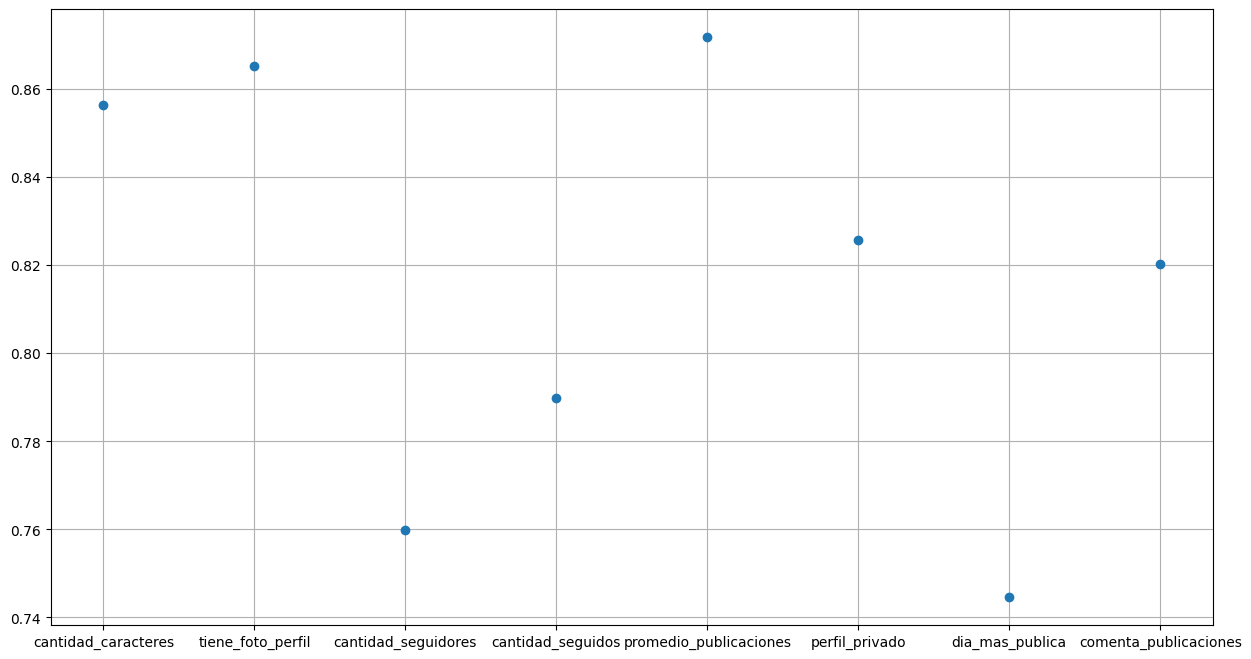

In [1405]:
xpoints = np.array([i for i in range(1, (len(entropis))+1)])
ypoints = np.array(entropis)

plt.figure(figsize=(15,8))
plt.plot(xpoints, ypoints, 'o')
plt.xticks([i for i in range(1, (len(entropis))+1)])
plt.gca().set_xticklabels(["cantidad_caracteres", "tiene_foto_perfil", "cantidad_seguidores", "cantidad_seguidos", "promedio_publicaciones", "perfil_privado", "dia_mas_publica", "comenta_publicaciones"])
plt.grid(True)
plt.show()

In [1406]:
result = np.where(entropis == entropis.min())

column_names = df.columns.tolist()
print(column_names[result[0][0]])
características_twitter.append(column_names[result[0][0]])

dia_mas_publica


In [1407]:
asociaciones = correlacion_Pearson(df=df, result=result)
print(asociaciones)

[0.6695732789289652, 0.6765435294936193, 0.14700487250925995, 0.3801537803045251, 0.8938874043654246, 0.0041243036388211056, 2.9614753755177167e-114, 0.4662887880308685]


In [1408]:
copy_asociaciones = asociaciones.copy()
copy_asociaciones.sort()

result1 = np.where(asociaciones == copy_asociaciones[1])
result2 = np.where(asociaciones == copy_asociaciones[2])

print(column_names[result1[0][0]])
características_twitter.append(column_names[result1[0][0]])
print(column_names[result2[0][0]])
características_twitter.append(column_names[result2[0][0]])

perfil_privado
cantidad_seguidores


In [1409]:
cabecera = ["cantidad_caracteres", "tiene_foto_perfil", "cantidad_seguidores", "cantidad_seguidos", "promedio_publicaciones", "perfil_privado", "dia_mas_publica", "comenta_publicaciones"]
datos = asociaciones

df_asociaciones = pd.DataFrame([datos], columns=cabecera)
df_asociaciones.head()

,cantidad_caracteres,tiene_foto_perfil,cantidad_seguidores,cantidad_seguidos,promedio_publicaciones,perfil_privado,dia_mas_publica,comenta_publicaciones
0,0.669573,0.676544,0.147005,0.380154,0.893887,0.004124,2.961475e-114,0.466289


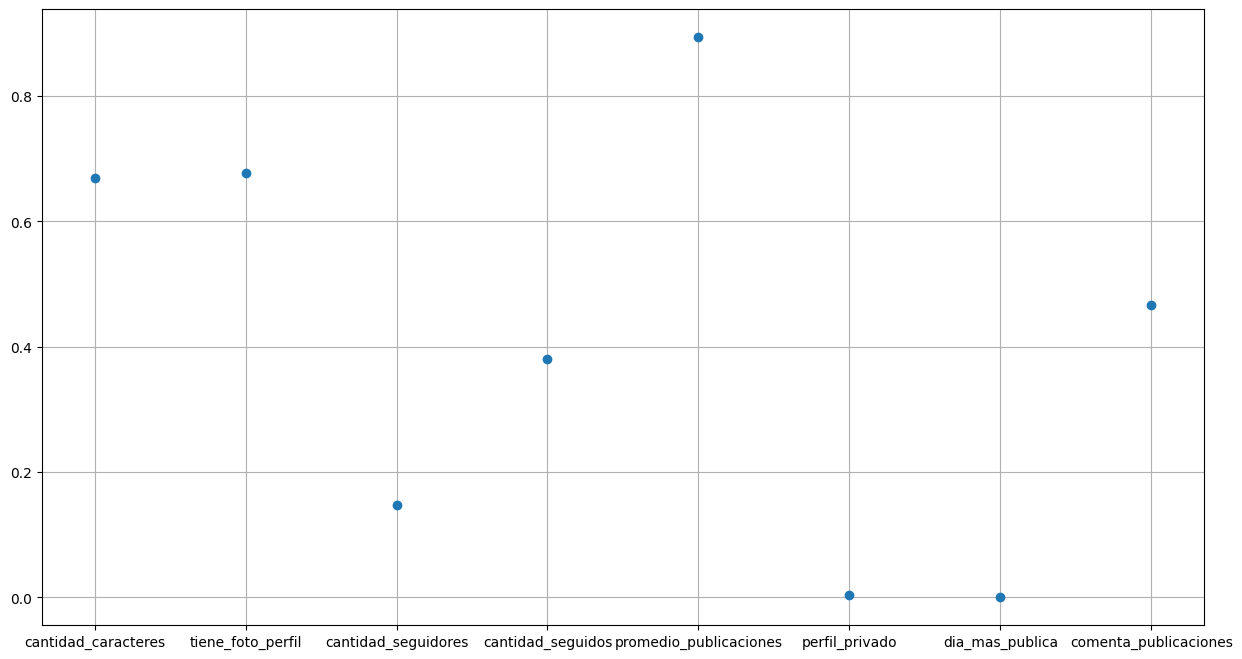

In [1410]:
xpoints = np.array([i for i in range(1, (len(asociaciones))+1)])
ypoints = np.array(asociaciones)

plt.figure(figsize=(15,8))
plt.plot(xpoints, ypoints, 'o')
plt.xticks([i for i in range(1, (len(asociaciones))+1)])
plt.gca().set_xticklabels(["cantidad_caracteres", "tiene_foto_perfil", "cantidad_seguidores", "cantidad_seguidos", "promedio_publicaciones", "perfil_privado", "dia_mas_publica", "comenta_publicaciones"])
plt.grid(True)
plt.show()

In [1411]:
print(características_twitter)

['dia_mas_publica', 'perfil_privado', 'cantidad_seguidores']


# **Facebook**

In [1412]:
df = pd.read_csv('Facebook.csv')
características_facebook = []

In [1413]:
df.head()

,Unnamed: 0,caracteres_nombre,foto_perfil,num_amigos,dias_mas_Publicaciones,paginas_que_sigue,Clase
0,0,corto,Sí,medio,fin de semana,pocas,T
1,1,medio,Sí,medio,fin de semana,pocas,T
2,2,medio,Sí,medio,fin de semana,pocas,T
3,3,corto,Sí,medio,fin de semana,pocas,T
4,4,corto,Sí,medio,media semana,pocas,T


In [1414]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Clase'] = df['Clase'].replace({'T': 0, 'F': 1})

In [1415]:
df.tail()

,caracteres_nombre,foto_perfil,num_amigos,dias_mas_Publicaciones,paginas_que_sigue,Clase
356,largo,Sí,medio,fin de semana,algunas,0
357,medio,Sí,bajo,ninguno,pocas,1
358,corto,Sí,bajo,ninguno,pocas,1
359,medio,Sí,alto,ninguno,pocas,1
360,largo,Sí,medio,ninguno,pocas,0


In [1416]:
facebook = df.to_numpy()

entropis = []
for i in np.arange(5):
    total_class = 2
    column_class = 5
    entropis.append(entropia(total_class=total_class, column=i, column_class=column_class, datos=facebook))
entropis = np.array(entropis)
print(entropis)

[0.83703369 0.80862243 0.75917363 0.78015983 0.88386406]


In [1417]:
print(entropis.min())

0.7591736292832085


In [1418]:
cabecera = ["caracteres_nombre","foto_perfil","num_amigos","dias_mas_Publicaciones","paginas_que_sigue"]
datos = entropis

df_entropi = pd.DataFrame([datos], columns=cabecera)
df_entropi.head()

,caracteres_nombre,foto_perfil,num_amigos,dias_mas_Publicaciones,paginas_que_sigue
0,0.837034,0.808622,0.759174,0.78016,0.883864


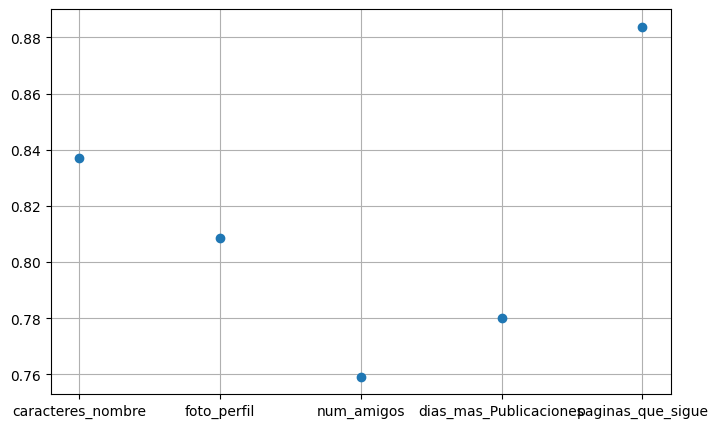

In [1419]:
xpoints = np.array([i for i in range(1, (len(entropis))+1)])
ypoints = np.array(entropis)

plt.figure(figsize=(8,5))
plt.plot(xpoints, ypoints, 'o')
plt.xticks([i for i in range(1, (len(entropis))+1)])
plt.gca().set_xticklabels(["caracteres_nombre","foto_perfil","num_amigos","dias_mas_Publicaciones","paginas_que_sigue"])
plt.grid(True)
plt.show()

In [1420]:
result = np.where(entropis == entropis.min())

column_names = df.columns.tolist()
print(column_names[result[0][0]])
características_facebook.append(column_names[result[0][0]])

num_amigos


In [1421]:
asociaciones = correlacion_Pearson(df=df, result=result)
print(asociaciones)

[0.00030281789792722393, 0.06455719567727991, 2.159232275578837e-227, 5.5033376997370475e-05, 7.387512277333189e-05]


In [1422]:
copy_asociaciones = asociaciones.copy()
copy_asociaciones.sort()

result1 = np.where(asociaciones == copy_asociaciones[1])
result2 = np.where(asociaciones == copy_asociaciones[2])


print(column_names[result1[0][0]])
características_facebook.append(column_names[result1[0][0]])
print(column_names[result2[0][0]])
características_facebook.append(column_names[result2[0][0]])

dias_mas_Publicaciones
paginas_que_sigue


In [1423]:
print(características_facebook)

['num_amigos', 'dias_mas_Publicaciones', 'paginas_que_sigue']


In [1424]:
cabecera = ["caracteres_nombre","foto_perfil","num_amigos","dias_mas_Publicaciones","paginas_que_sigue"]
datos = asociaciones

df_asociaciones = pd.DataFrame([datos], columns=cabecera)
df_asociaciones.head()

,caracteres_nombre,foto_perfil,num_amigos,dias_mas_Publicaciones,paginas_que_sigue
0,0.000303,0.064557,2.159232e-227,0.000055,0.000074


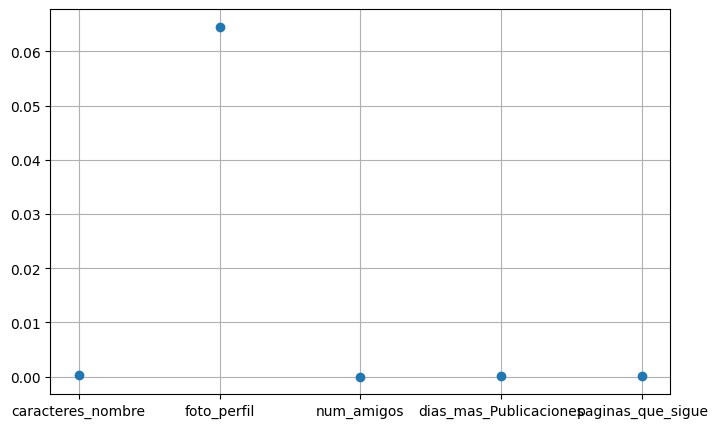

In [1425]:
xpoints = np.array([i for i in range(1, (len(asociaciones))+1)])
ypoints = np.array(asociaciones)

plt.figure(figsize=(8,5))
plt.plot(xpoints, ypoints, 'o')
plt.xticks([i for i in range(1, (len(asociaciones))+1)])
plt.gca().set_xticklabels(["caracteres_nombre","foto_perfil","num_amigos","dias_mas_Publicaciones","paginas_que_sigue"	])
plt.grid(True)
plt.show()

# **Reconocimiento Perfiles**

In [1426]:
df = pd.read_csv('ReconocimientoPerfiles.csv')
rp_caracteristicas = []

In [1427]:
df.head()

,Unnamed: 0,Edad,Genero,Tutor,Vive-con-Familia,Enfermedad-CrÃ³nica,Promedio-Preparatoria,Materias-Relacionadas,Carrera-Elegida-Ajusta-A-Gustos-Habilidades,Buena-RelaciÃ³n-Familiar,Buena-RelaciÃ³n-Amigos-CompaÃ±eros,Materias-Cursadas-Primer-Semestre,Promedio-Primer-Semestre,Materias-Aprobadas-Primer-Semestre,Materias-Reprobadas-De-ComputaciÃ³n,Materias-Reprobadas-De-MatemÃ¡ticas,Materias-Reprobadas-De-Ciensias-Sociales,Horas-Promedio-Estudio-Examenes,Horas-Promedio-Estudio-Actividades-Escolares,Cursos-Extra-Primer-Semestre,Noviazgo,Actividad-Cultural-o-Deportiva,Tiempo-con-sus-amigos-compaÃ±eros,Horas-Semana-Divertirse con-sus-amigos,ConsumÃ­a-Alcohol-Entre-semana,ConsumÃ­a-Alcohol-Fin-semana,Horas-DÃ­a-Dedicada-Redes-Sociales,Gustan-Videojuegos,Horas-Semana-Dedicada-Videojuegos,Horas-Semana-Dedicada-Actividades-Entretenimiento
0,0,señor,Masculino,Madre,No,No,bueno,Sí,Sí,No,No,muchas,malo,pocas,Sí,No,No,baja,baja,No,No,No,No,baja,nunca,nunca,<1,No,0,1-3
1,1,señor,Masculino,Madre,Sí,No,bueno,No,Sí,Sí,Sí,algunas,malo,pocas,No,Sí,No,baja,baja,No,Sí,Sí,Sí,media,casi-nunca,a veces,>2,Sí,>3,1-3
2,2,señor,Masculino,Padre,Sí,No,regular,No,Sí,Sí,Sí,muchas,regular,muchas,No,No,No,baja,baja,No,Sí,No,Sí,baja,casi-nunca,casi-nunca,1-2,Sí,1-3,1-3
3,3,joven,Masculino,Madre,No,No,bueno,Sí,No,Sí,Sí,algunas,regular,pocas,Sí,No,No,baja,baja,No,No,Sí,Sí,baja,a veces,regularmente,1-2,No,0,1-3
4,4,joven,Masculino,Madre,Sí,No,regular,No,No,No,Sí,algunas,regular,algunas,No,No,No,baja,baja,No,Sí,No,No,baja,nunca,casi-nunca,1-2,Sí,>3,>3


In [1428]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df['Promedio-Primer-Semestre'] = df['Promedio-Primer-Semestre'].replace({'malo': 0, 'regular': 1, 'bueno': 2})

df = df.loc[:, ['Edad','Genero','Tutor','Vive-con-Familia','Enfermedad-CrÃ³nica','Promedio-Preparatoria','Materias-Relacionadas','Carrera-Elegida-Ajusta-A-Gustos-Habilidades','Buena-RelaciÃ³n-Familiar','Buena-RelaciÃ³n-Amigos-CompaÃ±eros','Materias-Cursadas-Primer-Semestre','Materias-Aprobadas-Primer-Semestre','Materias-Reprobadas-De-ComputaciÃ³n','Materias-Reprobadas-De-MatemÃ¡ticas','Materias-Reprobadas-De-Ciensias-Sociales','Horas-Promedio-Estudio-Examenes','Horas-Promedio-Estudio-Actividades-Escolares','Cursos-Extra-Primer-Semestre','Noviazgo','Actividad-Cultural-o-Deportiva','Tiempo-con-sus-amigos-compaÃ±eros','Horas-Semana-Divertirse con-sus-amigos','ConsumÃ­a-Alcohol-Entre-semana','ConsumÃ­a-Alcohol-Fin-semana','Horas-DÃ­a-Dedicada-Redes-Sociales','Gustan-Videojuegos','Horas-Semana-Dedicada-Videojuegos','Horas-Semana-Dedicada-Actividades-Entretenimiento','Promedio-Primer-Semestre']]

In [1429]:
df.tail()

,Edad,Genero,Tutor,Vive-con-Familia,Enfermedad-CrÃ³nica,Promedio-Preparatoria,Materias-Relacionadas,Carrera-Elegida-Ajusta-A-Gustos-Habilidades,Buena-RelaciÃ³n-Familiar,Buena-RelaciÃ³n-Amigos-CompaÃ±eros,Materias-Cursadas-Primer-Semestre,Materias-Aprobadas-Primer-Semestre,Materias-Reprobadas-De-ComputaciÃ³n,Materias-Reprobadas-De-MatemÃ¡ticas,Materias-Reprobadas-De-Ciensias-Sociales,Horas-Promedio-Estudio-Examenes,Horas-Promedio-Estudio-Actividades-Escolares,Cursos-Extra-Primer-Semestre,Noviazgo,Actividad-Cultural-o-Deportiva,Tiempo-con-sus-amigos-compaÃ±eros,Horas-Semana-Divertirse con-sus-amigos,ConsumÃ­a-Alcohol-Entre-semana,ConsumÃ­a-Alcohol-Fin-semana,Horas-DÃ­a-Dedicada-Redes-Sociales,Gustan-Videojuegos,Horas-Semana-Dedicada-Videojuegos,Horas-Semana-Dedicada-Actividades-Entretenimiento,Promedio-Primer-Semestre
137,joven,Masculino,Madre,No,No,bueno,Sí,No,Sí,Sí,algunas,algunas,No,Sí,No,baja,media,No,No,No,No,baja,nunca,nunca,<1,Sí,1-3,1-3,0
138,joven,Femenino,Madre,No,No,bueno,No,No,Sí,No,algunas,pocas,Sí,Sí,No,media,baja,Sí,No,No,Sí,media,nunca,casi-nunca,>2,No,0,>3,0
139,señor,Masculino,Pariente,No,No,regular,No,No,No,No,algunas,algunas,Sí,Sí,No,baja,baja,No,No,No,No,baja,nunca,nunca,0,No,0,1-3,0
140,joven,Masculino,Madre,No,No,bueno,Sí,Sí,Sí,Sí,algunas,algunas,No,No,No,baja,baja,No,No,Sí,Sí,baja,nunca,nunca,>2,Sí,1-3,1-3,1
141,joven,Masculino,Madre,Sí,No,bueno,Sí,No,Sí,Sí,algunas,algunas,Sí,Sí,No,baja,baja,No,No,No,No,baja,nunca,nunca,>2,Sí,>3,>3,0


In [1430]:
perfiles = df.to_numpy()

entropis = []
for i in np.arange(29):
    total_class = 3
    column_class = 28
    entropis.append(entropia(total_class=total_class, column=i, column_class=column_class, datos=perfiles))
entropis = np.array(entropis)
entropis = np.delete(entropis, -1)
print(entropis)

[1.09293454 1.10494314 1.00427021 1.08446664 1.16507837 1.08792193
 1.07304613 1.07998783 1.13797752 1.08811103 1.08563791 1.00427979
 1.00336711 1.02930728 1.15124587 1.07195744 1.1021616  1.12711205
 1.08999735 1.10133315 1.09851236 0.97555931 1.01693176 0.93909547
 0.9409765  1.09120182 0.96358662 1.05634074]


In [1431]:
print(entropis.min())

0.9390954682061301


In [1432]:
cabecera = list(map(str, [i for i in range(1, (len(entropis))+1)]))
datos = entropis

df_entropi = pd.DataFrame([datos], columns=cabecera)
pd.set_option('display.max_columns', None)
df_entropi.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.092935,1.104943,1.00427,1.084467,1.165078,1.087922,1.073046,1.079988,1.137978,1.088111,1.085638,1.00428,1.003367,1.029307,1.151246,1.071957,1.102162,1.127112,1.089997,1.101333,1.098512,0.975559,1.016932,0.939095,0.940977,1.091202,0.963587,1.056341


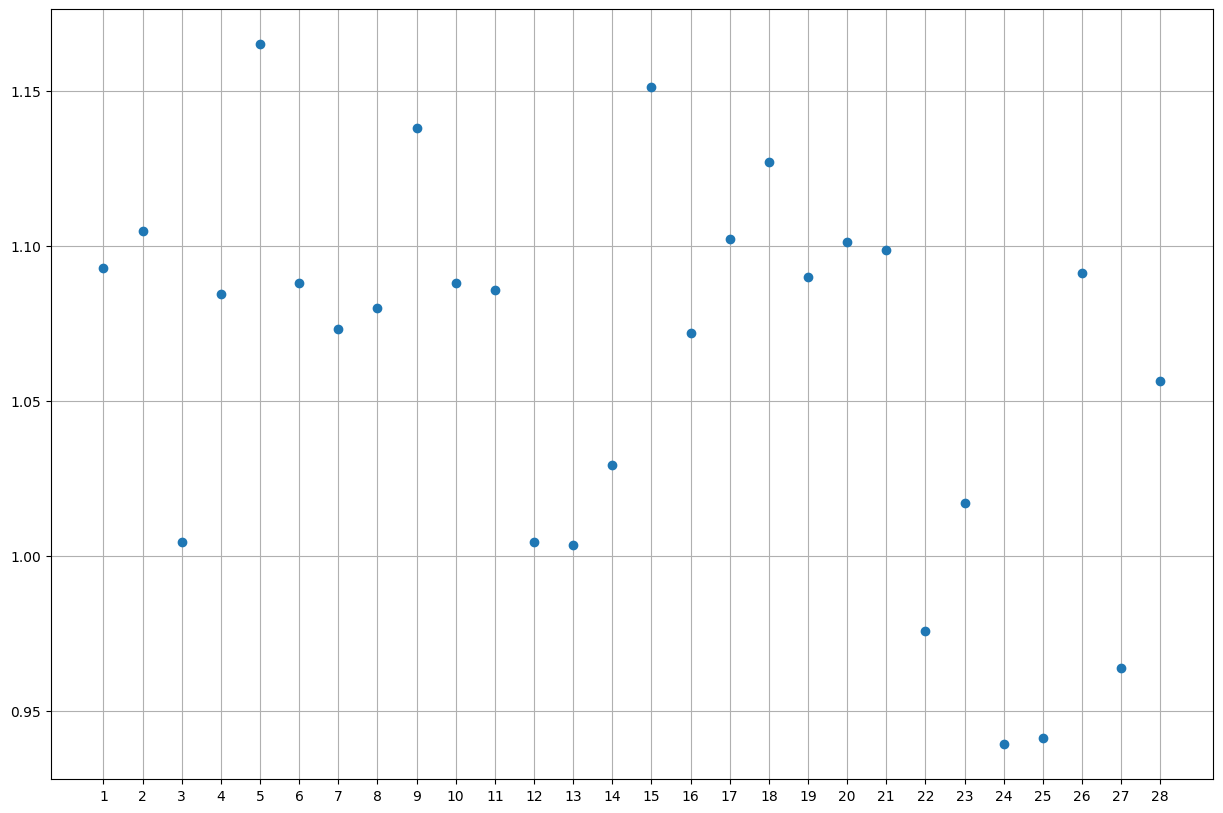

In [1433]:
xpoints = np.array([i for i in range(1, (len(entropis))+1)])
ypoints = np.array(entropis)

plt.figure(figsize=(15,10))
plt.plot(xpoints, ypoints, 'o')
plt.xticks([i for i in range(1, (len(entropis))+1)])
plt.gca().set_xticklabels(list(map(str, [i for i in range(1, (len(entropis))+1)])))
plt.grid(True)
plt.show()

In [1434]:
result = np.where(entropis == entropis.min())
result = winner_profiles

column_names = df.columns.tolist()
print(column_names[winner_profiles[0][0]])
rp_caracteristicas.append(column_names[winner_profiles[0][0]])

Materias-Reprobadas-De-ComputaciÃ³n


In [1435]:
asociaciones = correlacion_Pearson(df=df, result=result)
print(asociaciones)

[0.6670707365662483, 1.0, 0.37626033403430614, 0.7385736208793025, 0.5749299318557305, 1.0, 1.0, 0.010640743637040624, 0.20317747654307655, 0.835091915035379, 0.3005857801884984, 9.425535217522525e-06, 1.0047717875455629e-31, 0.00012679884710864803, 0.2645469812750345, 0.35259481334224224, 0.4023951905862087, 0.4967297793375648, 0.05086185566146317, 0.5733835603207353, 0.17922639699075196, 0.6613953795978279, 0.22378947340584582, 0.259980503807206, 0.40875696099445025, 0.3764666461301457, 0.5570237370948217, 0.2819491334055315]


In [1436]:
copy_asociaciones = asociaciones.copy()
copy_asociaciones.sort()

result1 = np.where(asociaciones == copy_asociaciones[1])
result2 = np.where(asociaciones == copy_asociaciones[2])

print(column_names[result1[0][0]])
rp_caracteristicas.append(column_names[result1[0][0]])
print(column_names[result2[0][0]])
rp_caracteristicas.append(column_names[result2[0][0]])

Materias-Aprobadas-Primer-Semestre
Materias-Reprobadas-De-MatemÃ¡ticas


In [1437]:
print(rp_caracteristicas)

['Materias-Reprobadas-De-ComputaciÃ³n', 'Materias-Aprobadas-Primer-Semestre', 'Materias-Reprobadas-De-MatemÃ¡ticas']


In [1438]:
cabecera = list(map(str, [i for i in range(1, (len(asociaciones))+1)]))
datos = asociaciones

df_asociaciones = pd.DataFrame([datos], columns=cabecera)
pd.set_option('display.max_columns', None)
df_asociaciones.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.667071,1.0,0.37626,0.738574,0.57493,1.0,1.0,0.010641,0.203177,0.835092,0.300586,0.000009,1.004772e-31,0.000127,0.264547,0.352595,0.402395,0.49673,0.050862,0.573384,0.179226,0.661395,0.223789,0.259981,0.408757,0.376467,0.557024,0.281949


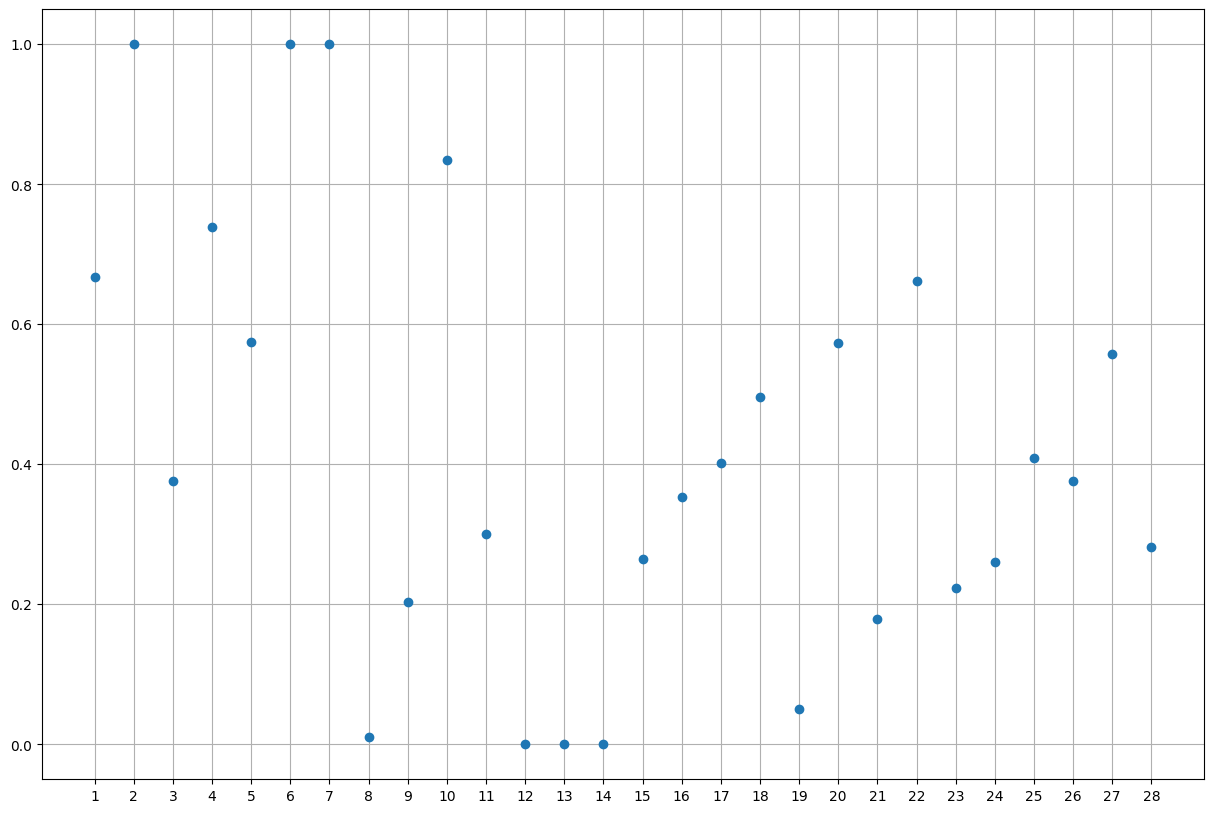

In [1439]:
xpoints = np.array([i for i in range(1, (len(asociaciones))+1)])
ypoints = np.array(asociaciones)

plt.figure(figsize=(15,10))
plt.plot(xpoints, ypoints, 'o')
plt.xticks([i for i in range(1, (len(asociaciones))+1)])
plt.gca().set_xticklabels(list(map(str, [i for i in range(1, (len(asociaciones))+1)])))
plt.grid(True)
plt.show()